In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [5]:
# X = np.array([], ndmin = 2)
# X

array([], shape=(1, 0), dtype=float64)

In [6]:
# print(X)

[]


In [10]:
# X0 = np.zeros(())
# X0

SyntaxError: invalid syntax (<ipython-input-10-b55ce08bc61b>, line 1)

In [9]:
# print(X0)

0.0


In [11]:
# X_0 = np.zeros((3, 4))
# X_0

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
# print(X_0)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
# y_0 = np.zeros(X_0.shape[0])
# y_0

array([0., 0., 0.])

In [14]:
# print(y_0)

[0. 0. 0.]


In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [3]:
print(f"X_train:\n{X_train}\n\ny_train:\n{y_train}")

X_train:
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]

y_train:
[460 232 178]


In [24]:
"""
def calc_f_wb(X, w, b):
    m = X.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(X[i], w)
    f_wb += b
    return f_wb

In [4]:
m, n = X_train.shape
print(m, n)

3 4


In [5]:
b_init = 0.
w_init = np.zeros((n,))
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [6]:
"""
f_wb_init = calc_f_wb(X_train, w_init, b_init)
f_wb_init

NameError: name 'calc_f_wb' is not defined

In [10]:
def calc_cost(X, y, w, b):
    J_wb = 0.0
    m = X.shape[0]
    for i in range(m):
        f_wb_i = np.dot(X[i], w)
        J_wb += (f_wb_i - y[i]) ** 2
    J_wb /= 2*m
    return J_wb

In [33]:
"""
def calc_f_J(X, y, w, b):
    m = X.shape[0]
    f_wb = np.zeros(m)
    J_wb = 0.0
    
    for i in range(m):
        f_wb[i] = np.dot(X[i], w)
        J_wb += (f_wb[i] - y[i]) ** 2
    J_wb /= 2*m

    return f_wb, J_wb

In [11]:
J_wb = calc_cost(X_train, y_train, w_init, b_init)
J_wb

49518.0

In [12]:
def compute_gradients(X, y, w, b): 
    m, n = X.shape
    dJ_dw = np.zeros((n,))
    dJ_db = 0.
    
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        err = f_wb_i - y[i]
        dJ_db += err
        for j in range (n):
            dJ_dw[j] += err * X[i, j]

    dJ_dw /= m
    dJ_db /= m
    
    return dJ_dw, dJ_db

In [14]:
dJ_dw_init, dJ_db_init = compute_gradients(X_train, y_train, w_init, b_init)
print(f"dJ_dw_init: {dJ_dw_init}\n\ndJ_db_init: {dJ_db_init}")

dJ_dw_init: [-4.83e+05 -1.12e+03 -3.67e+02 -1.21e+04]

dJ_db_init: -290.0


In [101]:
# dJ_dw_init

array([-4.83e+05, -1.12e+03, -3.67e+02, -1.21e+04])

In [102]:
# dJ_db_init

-290.0

In [85]:
def gradient_descent(X, y, w_in, b_in, J_wb, gradients, alpha, num_iters):
    
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dJ_dw_i, dJ_db_i = gradients(X, y, w, b)

        w -= alpha * dJ_dw_i
        b -= alpha * dJ_db_i
        
        if i<=200000:
            J_history.append(J_wb(X, y, w, b))
            
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
            
    return w, b, J_history

In [86]:
iterations = 200000
alpha = 8.12e-7

In [87]:
w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init,
                                                    calc_cost, compute_gradients, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 43709.00   
Iteration 20000: Cost   579.05   
Iteration 40000: Cost   568.31   
Iteration 60000: Cost   563.59   
Iteration 80000: Cost   559.25   
Iteration 100000: Cost   554.96   
Iteration 120000: Cost   550.71   
Iteration 140000: Cost   546.49   
Iteration 160000: Cost   542.30   
Iteration 180000: Cost   538.14   
b,w found by gradient descent: -0.01,[ 0.24  0.9  -2.56 -1.51] 
prediction: 439.99, target value: 460
prediction: 277.76, target value: 232
prediction: 151.36, target value: 178


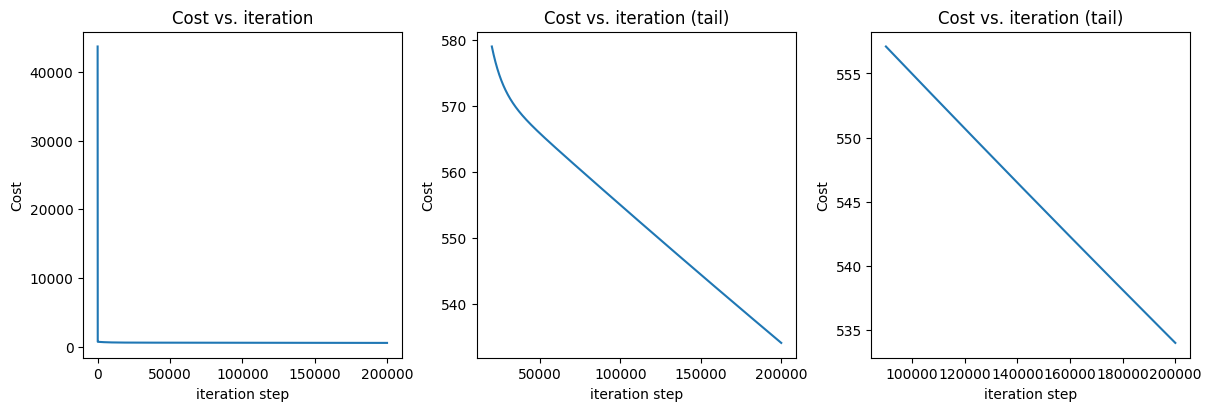

In [88]:
# plot cost versus iteration  
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(20000 + np.arange(len(J_hist[20000:])), J_hist[20000:])
ax3.plot(90000 + np.arange(len(J_hist[90000:])), J_hist[90000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)"); ax3.set_title("Cost vs. iteration (tail)");
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost'); ax3.set_ylabel('Cost');
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step'); ax3.set_xlabel('iteration step');
plt.show()

## Scaling